<a href="https://colab.research.google.com/github/uma-27/IRIS-FLOWER-CLASSIFICATION-OIBSIP/blob/main/TASK_2_Unemployment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv("/Unemployment in India.csv")
data = pd.read_csv("/Unemployment_Rate_upto_11_2020.csv")
print(data.head())

           Region        Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-01-2020          M                              5.48   
1  Andhra Pradesh  29-02-2020          M                              5.83   
2  Andhra Pradesh  31-03-2020          M                              5.79   
3  Andhra Pradesh  30-04-2020          M                             20.51   
4  Andhra Pradesh  31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     7

In [18]:
print(data.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [19]:
data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]

In [20]:
data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


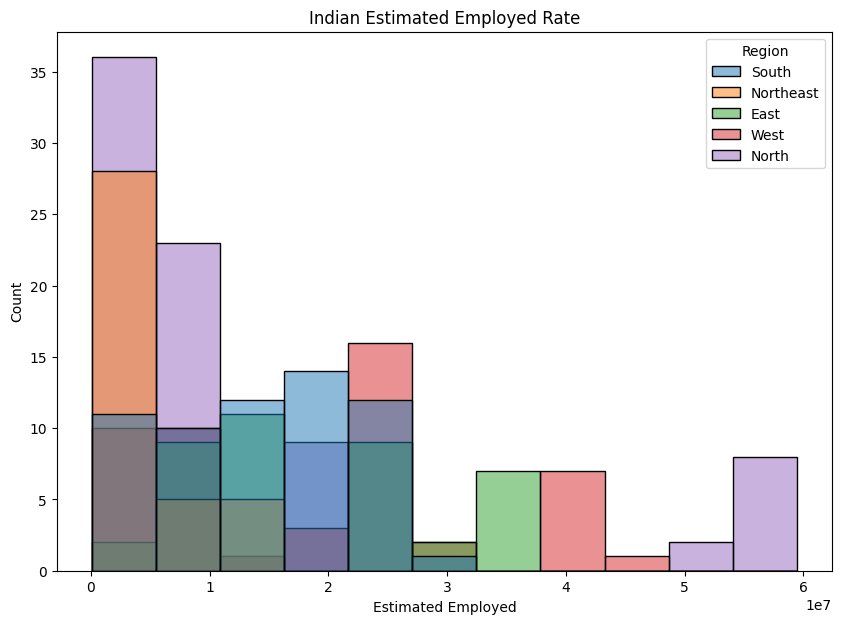

In [21]:
plt.figure(figsize=(10,7))
plt.title("Indian Estimated Employed Rate")
sns.histplot(x="Estimated Employed", hue="Region", data=data)
plt.show()

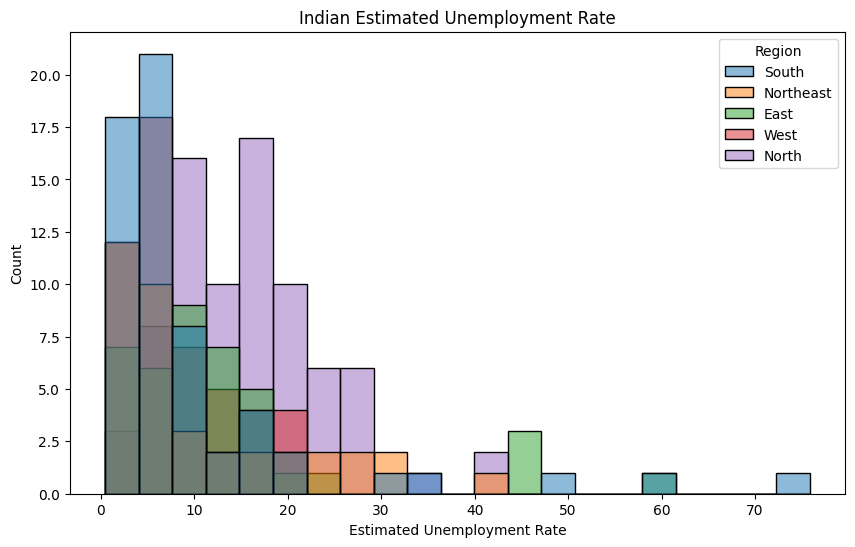

In [22]:
plt.figure(figsize=(10, 6))
plt.title("Indian Estimated Unemployment Rate")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=data)
plt.show()


In [23]:
figure=px.histogram(data,x="Estimated Labour Participation Rate",y="States",color="Region")
figure.show()

In [24]:
# take the mean of rate state by state
grouped_data = data.groupby(["States"])["Estimated Unemployment Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_data['States'].values, grouped_data['Estimated Unemployment Rate'].values, alpha=0.8)
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average of mean", fontsize=15)
plt.xticks(rotation='vertical')


TypeError: ignored

<Figure size 1200x800 with 0 Axes>

In [14]:
grouped_data = data.groupby(["Region"])["Estimated Unemployment Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_data['Region'].values, grouped_data['Estimated Unemployment Rate'].values, alpha=0.8)
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.title("Average of mean", fontsize=15)
plt.xticks(rotation='vertical')

TypeError: ignored

<Figure size 1200x800 with 0 Axes>

In [25]:
unemployment = data[["States", "Region", "Estimated Unemployment Rate"]]

fig = px.sunburst(unemployment, path=['Region','States'], values='Estimated Unemployment Rate',title= 'Unemployment rate in every State and Region', height=650)
fig.show()
